In [1]:
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
files = listdir('dados/')

In [188]:
def encontrar_picos(file):
    dado = pd.read_csv(f'dados/{file}', header=40, encoding = "ISO-8859-1")
    if dado.columns[0] == 'Print:':
        dado = pd.read_csv(f'dados/{file}', header=41, encoding = "ISO-8859-1")
    
    peak_indices, _ = find_peaks(dado['Absorbance'], height=0.1, distance=50)

    print('Índices:', end=' ')
    
    # Comprimento de onda
    lista_co = []
    
    for indice in peak_indices:
        co = dado['Wavelength (nm)'][indice]
        if co >= 300 and co <= 1300:
            lista_co.append(co)
            print(co, end=', ')
        else:
            lista_co.append(np.nan)
    
    print()
    print(f'CO: {lista_co}')
    
    plt.plot(np.array(dado['Wavelength (nm)']), np.array(dado['Absorbance']))
    plt.plot(np.array(dado['Wavelength (nm)'])[peak_indices], np.array(dado['Absorbance'])[peak_indices], "x")
    plt.title(file)
    plt.show()
    
    return lista_co

In [7]:
i = 0

primeiro_pico = []
segundo_pico = []
amostra = []

In [194]:
lista = encontrar_picos(files[i])

IndexError: list index out of range

In [190]:
pp = lista[0]
sp = lista[1]
f = files[i].replace('.txt','')

In [191]:
primeiro_pico.append(pp)
segundo_pico.append(sp)
amostra.append(f)

In [192]:
print(f'{primeiro_pico}\n{segundo_pico}\n{amostra}')

[nan, 598.0, 525.0, 535.0, nan, 525.0, 522.0, nan, 395.0, nan, 524.0, 526.0, 523.0, 579.0, 592.0, 525.0, 524.0, nan, nan, 528.0, 527.0, 525.0, 544.0, nan, 524.0, 563.0, 525.0, 552.0, 545.0, 524.0, 525.0, 523.0]
[nan, 712.0, 752.0, 740.0, nan, 763.0, 645.0, nan, nan, nan, 687.0, 779.0, nan, 703.0, 711.0, 752.0, 717.0, nan, nan, 761.0, 789.0, 795.0, 711.0, nan, 752.0, 745.0, nan, 751.0, 756.0, 802.0, 795.0, 646.0]
['T1', 'S1.1', '125uL de seed', 'AC 2.1', 'C1', '400uL de AgNO3', 'H5.1', 'T2', 'CTAB+HAuCl4', 'C3', '1160ul AA 0.01M', '600uL de AgNO3', '1000ul AA 0.01M', 'S4.1', 'S4', 'Nanorods teste 1', '200uL de AgNO3', 'T3', 'C2', '100uL de seed', '500uL de AgNO3', '175uL de seed', 'H4.1', '960ul AA 0.01M', '300uL de AgNO3', 'S2.2', 'AC 1.1', 'S3.3', 'AC 3.1', '150uL de seed', 'Nanorods teste 2', '1020ul AA 0.01M']


In [193]:
i += 1

#

In [195]:
dic = {'Amostra': amostra, 'Primeiro Pico': primeiro_pico, 'Segundo Pico': segundo_pico}

In [197]:
with open('data.txt', 'w') as f:
    print(dic, file=f)

In [198]:
df = pd.DataFrame(dic)

In [213]:
df_tratado = df.loc[-np.isnan(df['Primeiro Pico'])].loc[-np.isnan(df['Segundo Pico'])]

In [214]:
df_tratado.to_csv('data_tratado.txt')

In [234]:
abs_pp, abs_sp = [], []

for amostra, pp, sp in zip(df_tratado['Amostra'], df_tratado['Primeiro Pico'], df_tratado['Segundo Pico']):
    
    dado = pd.read_csv(f'dados/{amostra}.txt', header=40, encoding = "ISO-8859-1")
    
    if dado.columns[0] == 'Print:':
        dado = pd.read_csv(f'dados/{amostra}.txt', header=41, encoding = "ISO-8859-1")
    
    wavelength, absorbance = dado['Wavelength (nm)'], dado['Absorbance']
        
    index_pp = list(wavelength).index(pp)
    index_sp = list(wavelength).index(sp)
    
    abs_pp.append(absorbance[index_pp])
    abs_sp.append(absorbance[index_sp])
    
df_tratado['Abs 1º Pico'] = abs_pp
df_tratado['Abs 2º Pico'] = abs_sp

In [237]:
df_tratado = df_tratado.rename(columns={'Primeiro Pico': 'WL 1º Pico', 'Segundo Pico': 'WL 2º Pico'})

In [239]:
df_tratado.to_csv('df_tratado_2.csv')

In [240]:
df_tratado

,Amostra,WL 1º Pico,WL 2º Pico,Abs 1º Pico,Abs 2º Pico
1,S1.1,598.0,712.0,1.445,2.659
2,125uL de seed,525.0,752.0,0.821,0.782
3,AC 2.1,535.0,740.0,3.194,1.341
5,400uL de AgNO3,525.0,763.0,0.806,0.440
6,H5.1,522.0,645.0,0.913,1.307
10,1160ul AA 0.01M,524.0,687.0,1.065,0.360
11,600uL de AgNO3,526.0,779.0,0.815,0.354
13,S4.1,579.0,703.0,1.469,2.266
14,S4,592.0,711.0,1.618,2.409
15,Nanorods teste 1,525.0,752.0,0.821,0.782


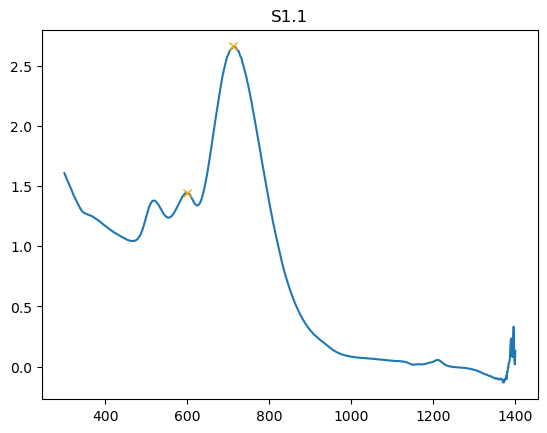

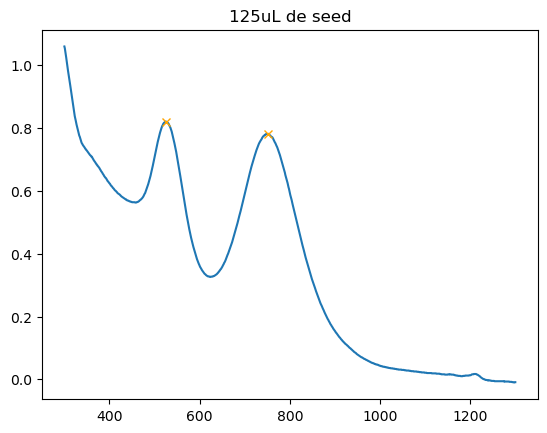

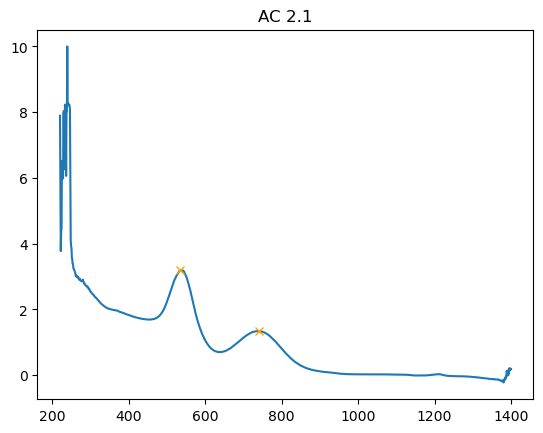

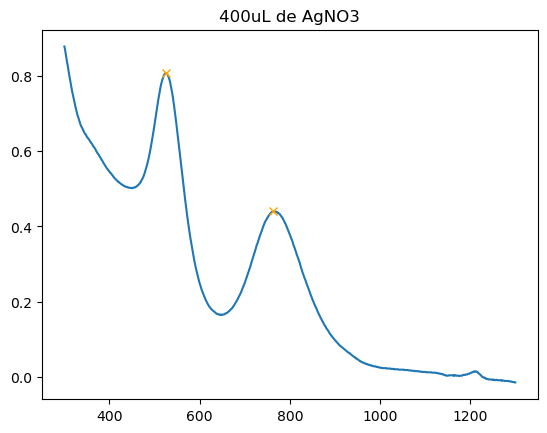

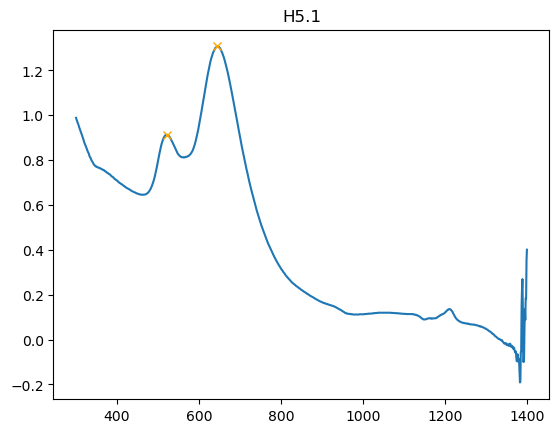

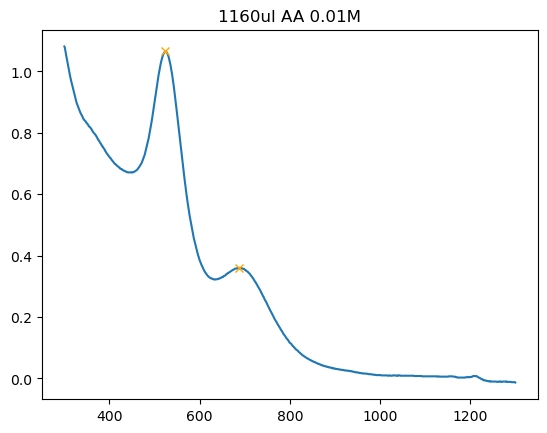

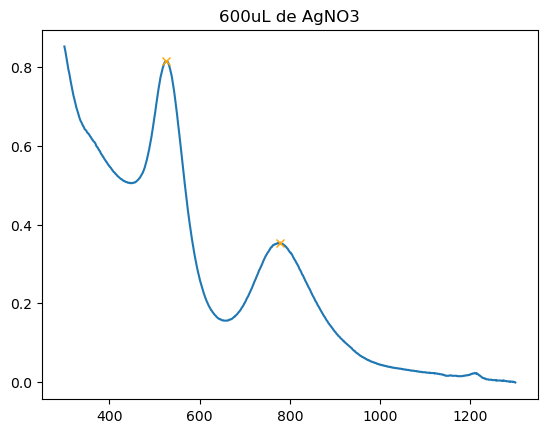

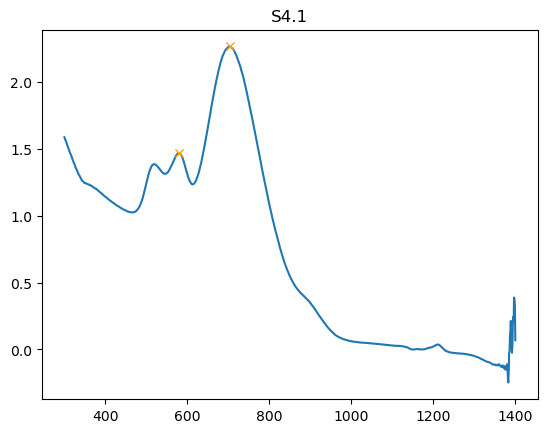

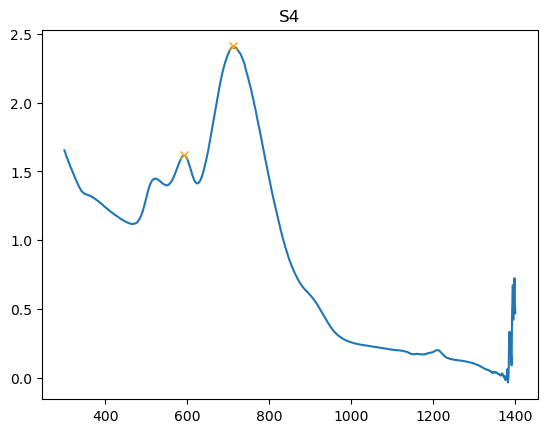

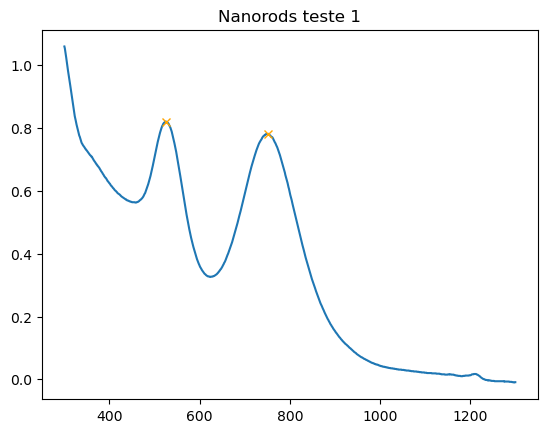

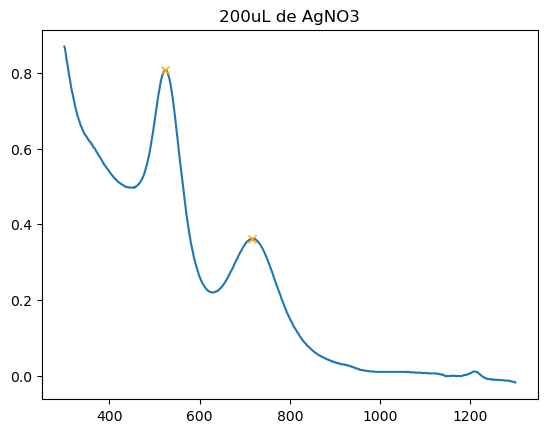

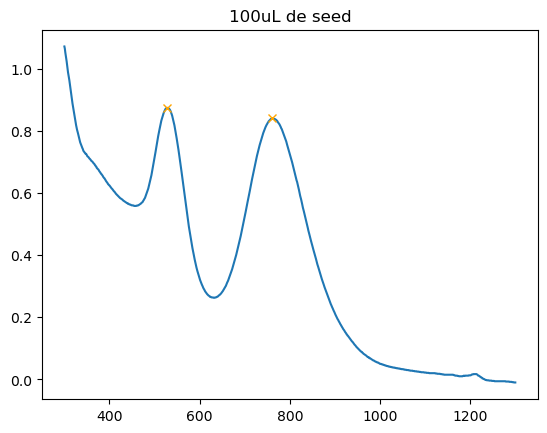

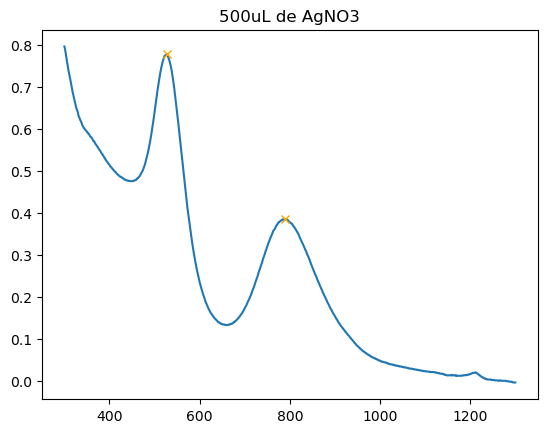

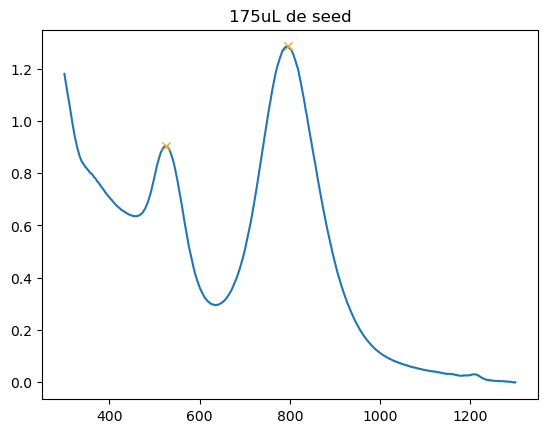

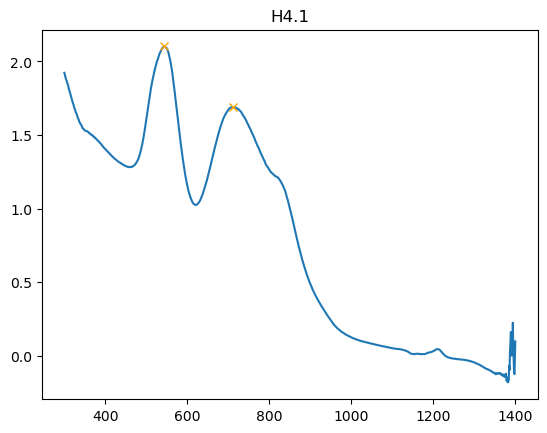

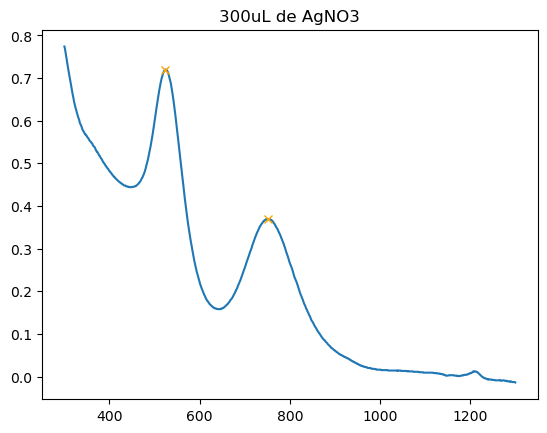

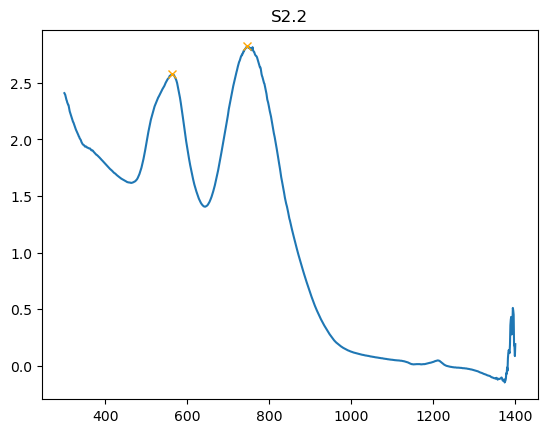

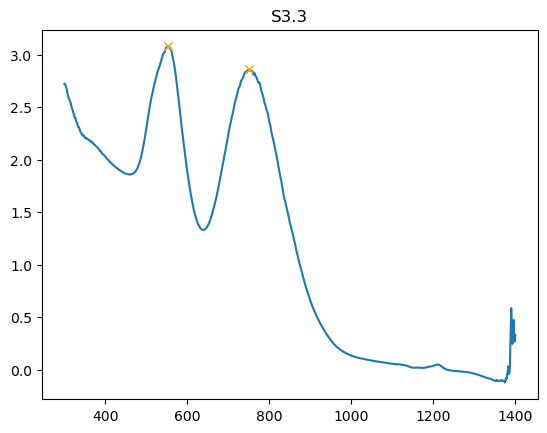

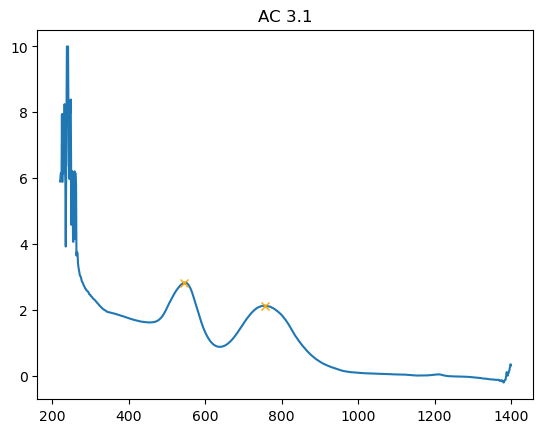

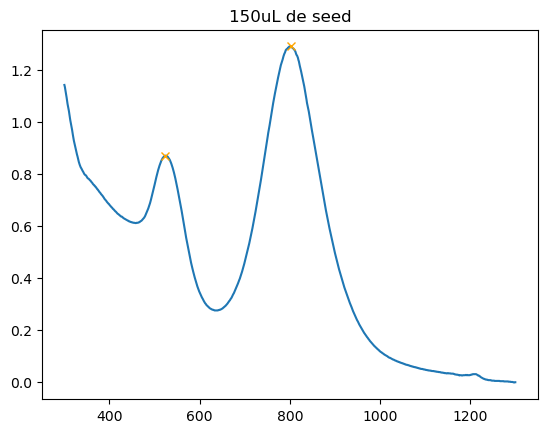

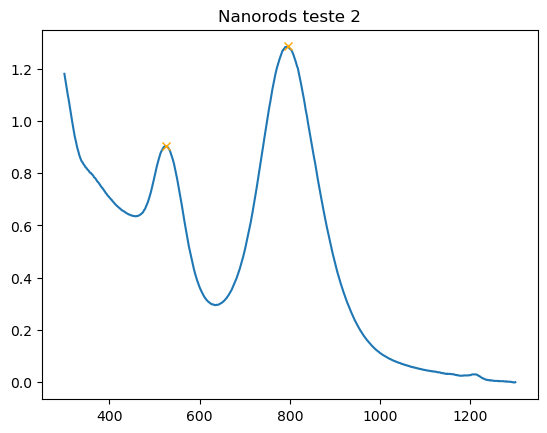

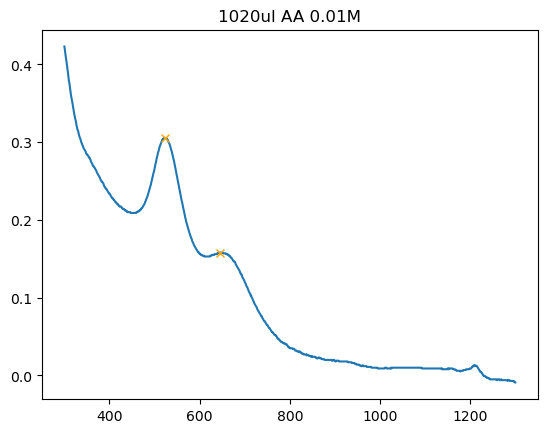

In [247]:
for amostra, wv_pp, wv_sp, abs_pp, abs_sp in zip(df_tratado['Amostra'], df_tratado['WL 1º Pico'], df_tratado['WL 2º Pico'], df_tratado['Abs 1º Pico'], df_tratado['Abs 2º Pico']):
    
    dado = pd.read_csv(f'dados/{amostra}.txt', header=40, encoding = "ISO-8859-1")
    if dado.columns[0] == 'Print:':
        dado = pd.read_csv(f'dados/{amostra}.txt', header=41, encoding = "ISO-8859-1")
        
    plt.plot(np.array(dado['Wavelength (nm)']), np.array(dado['Absorbance']))
    
    
    plt.plot(wv_pp, abs_pp, "x", color='orange')
    plt.plot(wv_sp, abs_sp, "x", color='orange')
    
    # plt.plot(np.array(dado['Wavelength (nm)'])[wv_pp], np.array(dado['Absorbance'])[abs_pp], "x")
    # plt.plot(np.array(dado['Wavelength (nm)'])[wv_sp], np.array(dado['Absorbance'])[abs_sp], "x")
    
    plt.title(amostra)
    plt.show()